In [16]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.1 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 데이터 로드

In [10]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터/project/reddit_ai_data_cleaned.csv")

In [11]:
# 문자열을 리스트로 변환
df['keyword'] = df['keyword'].apply(eval)

In [12]:
df.head()

,subreddit,title,body,created_date,year,month,keyword
0,ChatGPT,Forming Relationships and dating an AI: Part Two,This is a follow up to my first post \n[https...,2024-12-22 01:43:59,2024,12,"[follow, first, post, okay, wow, begin, lots, ..."
1,ChatGPT,AI can't be random?,"In both, ChatGPT and Gemini, I asked ""Tell me ...",2024-12-22 01:24:55,2024,12,"[chatgpt, gemini, ask, tell, random, number, a..."
2,ChatGPT,The moral dilemma of AI powered by nuclear energy,I recently learned something that I am having ...,2024-12-21 23:11:08,2024,12,"[recently, learn, something, trouble, settle, ..."
3,ChatGPT,AI Incest is a thing,I did now find out about AI incest. For those ...,2024-12-21 23:04:45,2024,12,"[find, ai, incest, know, refer, little, explan..."
4,ChatGPT,How AI Helped Me Navigate a Misdiagnosis.,I know some people post fake “how AI helped me...,2024-12-21 22:50:53,2024,12,"[know, people, post, fake, ai, help, story, th..."


### LDA

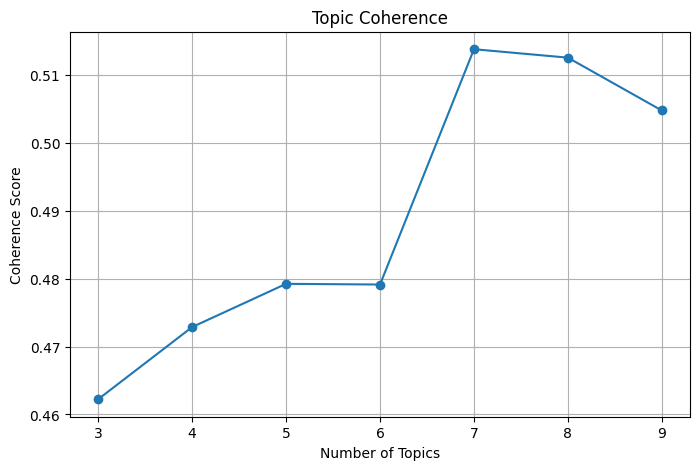

In [13]:
# Gensim 입력 준비
dictionary = Dictionary(df['keyword'])
corpus = [dictionary.doc2bow(keywords) for keywords in df['keyword']]

# 토픽 개수별 일관성 점수 계산
coherence_scores = []
topic_range = range(3, 10)

for n_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=10, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=df['keyword'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# 일관성 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title("Topic Coherence")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.grid(True)
plt.show()

In [14]:
# 최적 토픽 개수로 LDA 모델 훈련
lda_model = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=10, random_state=42)

# 각 토픽의 상위 단어 출력
print("\nTopics and their words:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


Topics and their words:
(0, '0.040*"ai" + 0.009*"human" + 0.009*"like" + 0.008*"make" + 0.007*"people"')
(1, '0.030*"object" + 0.023*"camera" + 0.018*"detection" + 0.013*"game" + 0.011*"detect"')
(2, '0.017*"data" + 0.017*"learn" + 0.013*"work" + 0.010*"would" + 0.010*"like"')
(3, '0.017*"model" + 0.017*"ai" + 0.011*"data" + 0.009*"paper" + 0.009*"learn"')
(4, '0.022*"import" + 0.011*"notebook" + 0.009*"annotation" + 0.008*"validation" + 0.007*"tag"')
(5, '0.029*"model" + 0.027*"use" + 0.016*"image" + 0.011*"data" + 0.009*"train"')


In [19]:
# PyLDAvis 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
